In [61]:
import numpy as np
import networkx as nx
from qwalk_simulator_helper import(
    classical_random_walk, quantum_walk, print_state_vectors,
    plot_graph, get_probability_difference, visualize_probabilities,
    create_cayley_tree, plot_cayley_tree_central)

### Define the Graph:
We can choose from the many NetworkX graph generators found at this link:

https://networkx.org/documentation/stable/reference/generators.html

We can specify any adjacency matrix, or build a graph using nx to directly add nodes and edges



In [78]:

# define any graph you'd like from the networkx library
G1 = nx.hypercube_graph(3)
G2 = nx.cycle_graph(10)
G3 = nx.grid_2d_graph(6, 6)
G4 = nx.balanced_tree(3,3)
G5 = nx.lollipop_graph(8,10)

# Or define a graph from an adjacency matrix (defined as an array) 
user_adj = np.array([
    [0,1,1,1,1,0,0],
    [1,0,1,1,1,0,0],
    [1,1,0,1,0,1,0],
    [1,1,1,0,1,1,1],
    [1,1,0,1,0,0,1],
    [0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0]
    ])

# Another option is to use networkx to define a method to generate any large size graph 


G6 = nx.from_numpy_array(user_adj)

# We can implement methods to generate graphs of particular interest
caylay_graph = create_cayley_tree(3,4)

### To See What We're Dealing With, Let's First Plot Our Graph

Let's start with the Cayley tree, as it also has an efficient discrete walk implementation found in this paper:

https://journals.aps.org/pra/abstract/10.1103/PhysRevA.86.042338




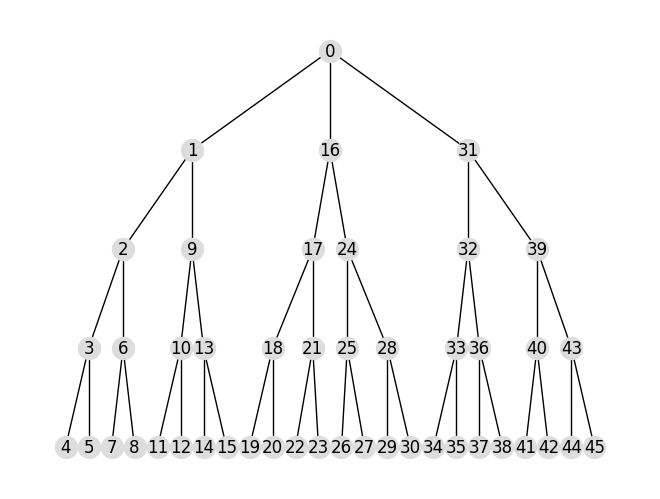

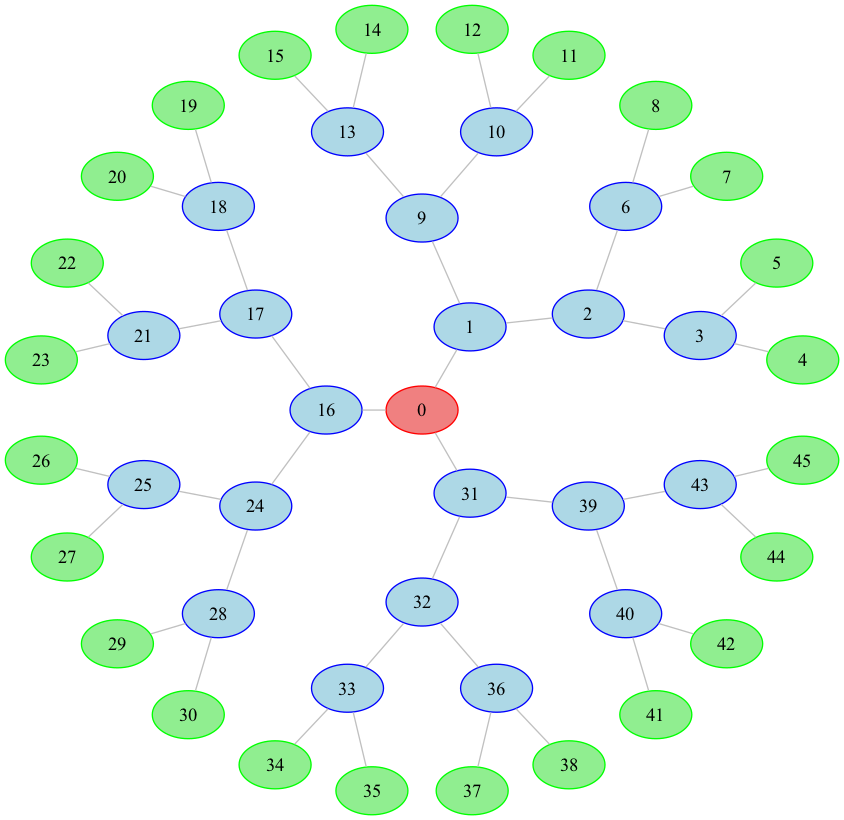

In [83]:
graph = caylay_graph

# Plot graphs
plot_graph(graph,labels=True)

# Plot specific graphs
plot_cayley_tree_central(caylay_graph)

### Choose the node where you'd like to start your walk
we might want to set psi0 to a superposition for the initial state.

In [84]:
# Initial state vector (starting at node 0)
#Get the adjacency from nx
A = nx.adjacency_matrix(graph)

num_nodes = A.shape[0]
pos_0 = np.zeros(num_nodes)
pos_0[0] = 1  # Classical initial state
psi_0 = pos_0.copy() # Quantum initial state

print(f"Classical initial state: {pos_0}")
print(f"\nQuantum initial state: {psi_0}")

Classical initial state: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Quantum initial state: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Let's run a single step based on a time step and the initial state

In [85]:
# Time parameters
t_c = 0.8
t_q= np.pi

# Compute the classical random walk probabilities
pos_t = classical_random_walk(adjacency = A, initial_position = pos_0, time_step = t_c)
prob_classical = pos_t

# Compute the quantum walk probabilities
psi_t = quantum_walk(adjacency = A, initial_position = psi_0, time_step = t_q)
prob_quantum = np.abs(psi_t)**2

#Compute the difference between classical and quantum
prob_diff = get_probability_difference(p_quantum=prob_quantum, p_classical=prob_classical)

print_state_vectors(prob_quantum, "Quantum Walk")
print_state_vectors(prob_classical, "Classical Walk")
print_state_vectors(prob_diff, "Difference")



==== Quantum Walk State Vector ====
Node 1: 0.0812
Node 2: 0.0000
Node 3: 0.0275
Node 4: 0.0602
Node 5: 0.0013
Node 6: 0.0013
Node 7: 0.0602
Node 8: 0.0013
Node 9: 0.0013
Node 10: 0.0275
Node 11: 0.0602
Node 12: 0.0013
Node 13: 0.0013
Node 14: 0.0602
Node 15: 0.0013
Node 16: 0.0013
Node 17: 0.0000
Node 18: 0.0275
Node 19: 0.0602
Node 20: 0.0013
Node 21: 0.0013
Node 22: 0.0602
Node 23: 0.0013
Node 24: 0.0013
Node 25: 0.0275
Node 26: 0.0602
Node 27: 0.0013
Node 28: 0.0013
Node 29: 0.0602
Node 30: 0.0013
Node 31: 0.0013
Node 32: 0.0000
Node 33: 0.0275
Node 34: 0.0602
Node 35: 0.0013
Node 36: 0.0013
Node 37: 0.0602
Node 38: 0.0013
Node 39: 0.0013
Node 40: 0.0275
Node 41: 0.0602
Node 42: 0.0013
Node 43: 0.0013
Node 44: 0.0602
Node 45: 0.0013
Node 46: 0.0013

==== Classical Walk State Vector ====
Node 1: 0.2041
Node 2: 0.1192
Node 3: 0.0416
Node 4: 0.0104
Node 5: 0.0027
Node 6: 0.0027
Node 7: 0.0104
Node 8: 0.0027
Node 9: 0.0027
Node 10: 0.0416
Node 11: 0.0104
Node 12: 0.0027
Node 13: 0.002

### Visualize the probability distribution by passing in the graph and the state vector. if the graph is large it's better to remove the labels 

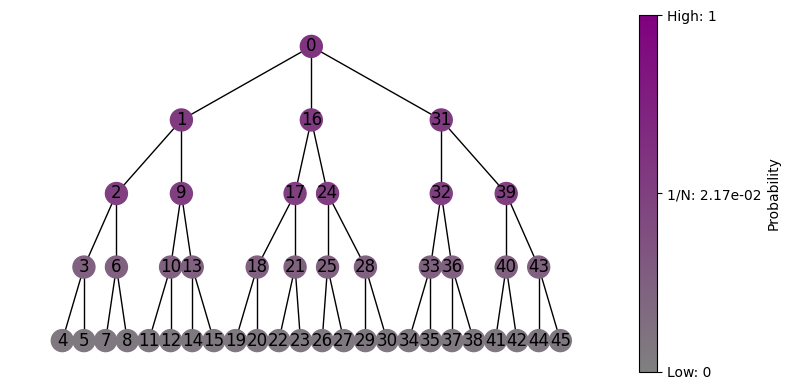

In [86]:
#Classical
visualize_probabilities(graph, prob_classical, labels=True)

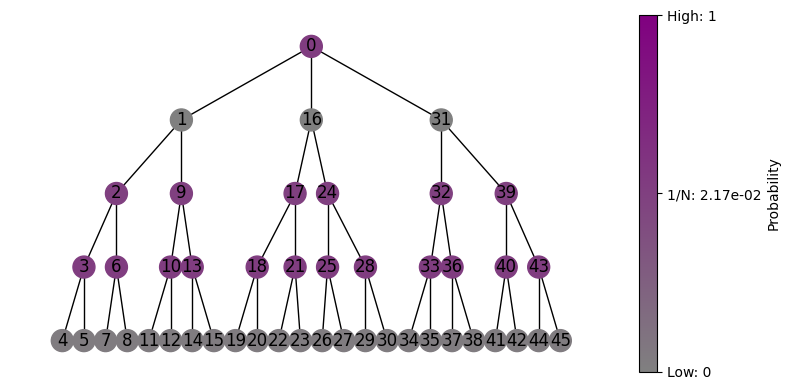

In [87]:
#Quantum  
visualize_probabilities(graph, prob_quantum, labels=True)

#### ### It's time to put it all together and try out different things 
#### Note: At the bottom of the page, there is an attempt to simulate an interactive walk with a time slider. We still need to fix the bug that makes the figure not show.


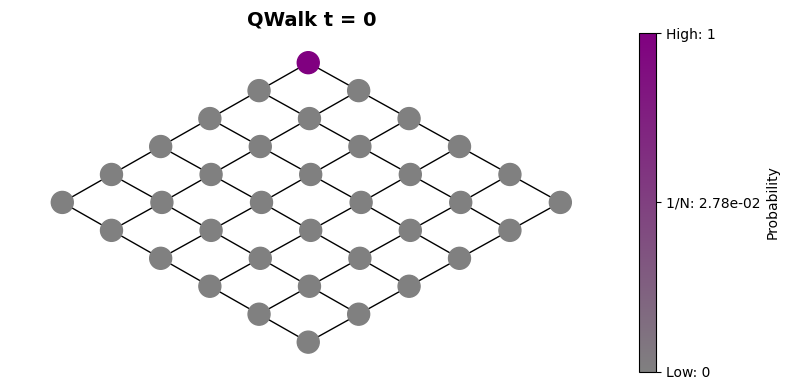

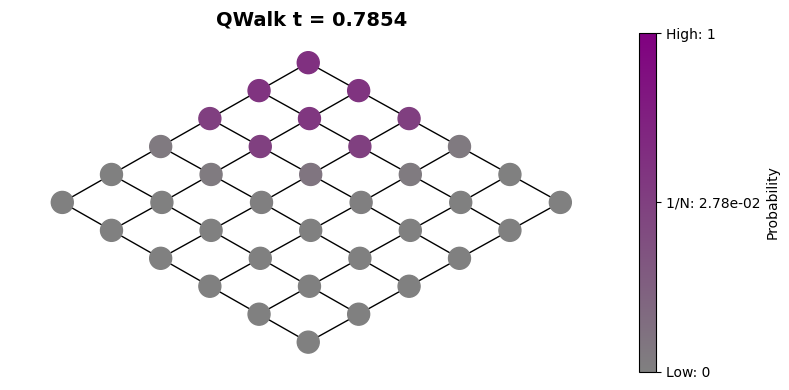

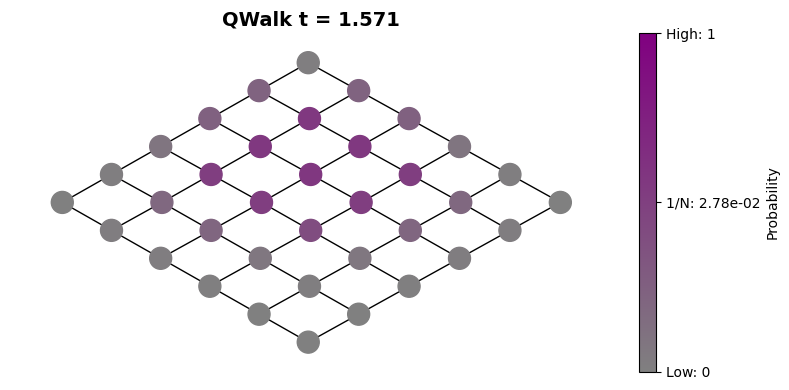

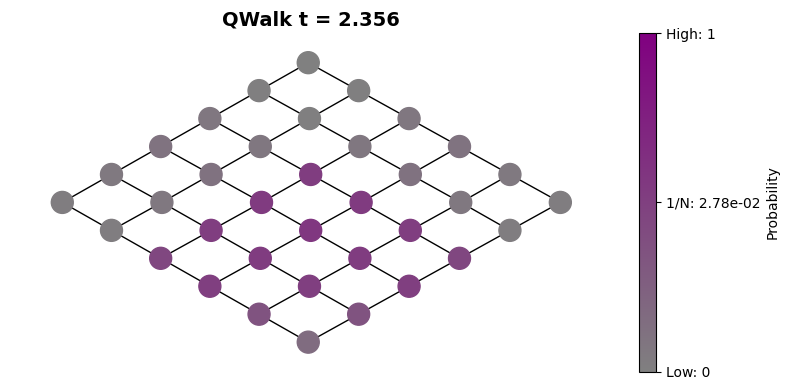

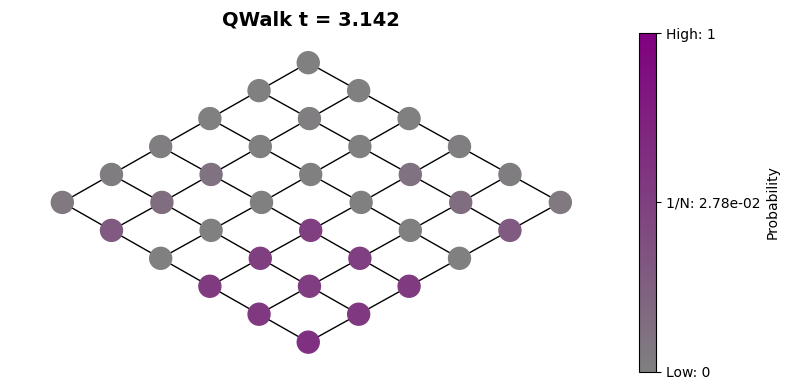

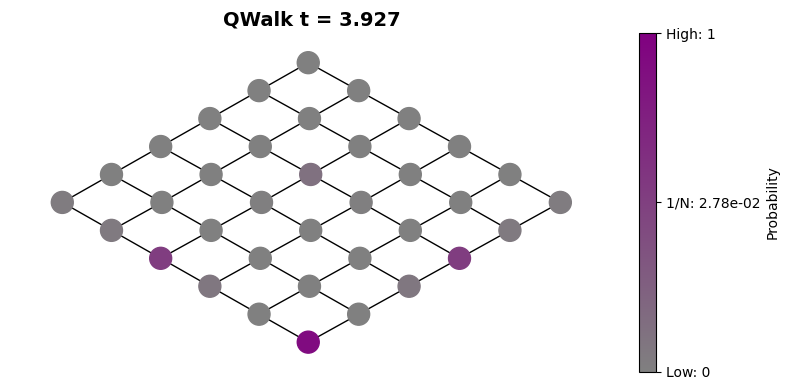

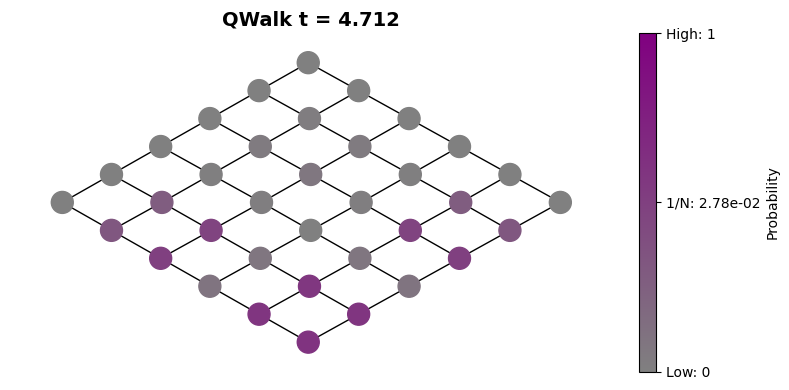

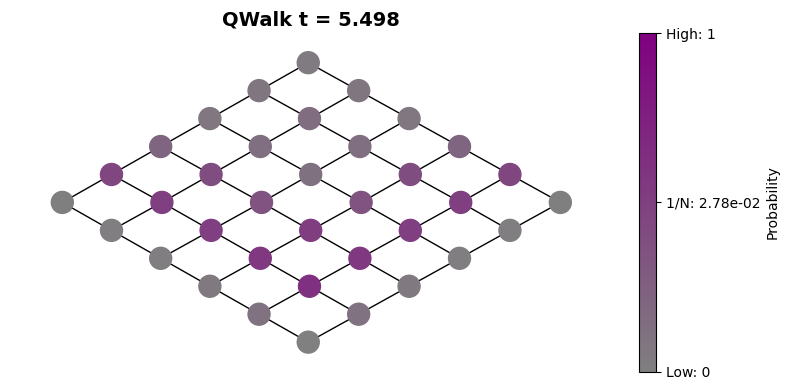

In [88]:
#Playground full of different graphs:

G1 = nx.hypercube_graph(3)
G2 = nx.cycle_graph(10)
G3 = nx.grid_2d_graph(6, 6)
G4 = nx.balanced_tree(3,3)
G5 = nx.lollipop_graph(8,10)

caylay_graph = create_cayley_tree(3,4)

user_adj = np.array([
    [0,1,1,1,1,0,0],
    [1,0,1,1,1,0,0],
    [1,1,0,1,0,1,0],
    [1,1,1,0,1,1,1],
    [1,1,0,1,0,0,1],
    [0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0]
    ])

G6 = nx.from_numpy_array(user_adj)

#Choose your graph
my_graph = G3

#Get the adjacency from nx
Adj = nx.adjacency_matrix(my_graph)

# Initial state vector 
num_nodes = Adj.shape[0]
pos_0 = np.zeros(num_nodes)
pos_0[0] = 1  # Classical initial state
psi_0 = pos_0.copy()  # Quantum initial state

# Time parameters: 
t_n = 0 # Starting time
timestep = np.pi/4 # step value
n = 8 # Number of steps


for i in range(n):

    # Compute the quantum walk probabilities
    psi_t = quantum_walk(adjacency = Adj, initial_position = psi_0, time_step = t_n)
    prob_quantum = np.abs(psi_t)**2
    title = f"QWalk t = {t_n:.4g}"
    visualize_probabilities(my_graph,prob_quantum, labels=False, title=title)
    
    # # Compute the classical walk probabilities
    # pos_t = classical_random_walk(adjacency = Adj, initial_position = pos_0, time_step = t_n)
    # title = f"Classical Walk, t = {t_n:.4g}"
    # visualize_probabilities(my_graph,pos_t, labels=False, title=title)
    
    t_n += timestep
    


### Will fix this soon :) 

In [ ]:
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import networkx as nx

# Create an output widget to display results
output = widgets.Output()

def update_plot(step_value):
    global t_classical, t_quantum
    t_classical += step_value
    t_quantum += step_value

    # Compute new probabilities
    pos_t = classical_random_walk(A, pos_0, t_classical)
    psi_t = quantum_walk(A, psi_0, t_quantum)
    prob_classical = pos_t
    prob_quantum = np.abs(psi_t)**2
    prob_diff = get_probability_difference(prob_quantum, prob_classical)

    # Clear previous output and display new
    with output:
        clear_output(wait=True)

        # Print results
        print(f"==== Classical State Vector ====\n{prob_classical}"
              f"\n\n==== Quantum State Vector ====\n{prob_quantum}")

        # # Plot Classical Walk Probabilities
        # visualize_probabilities(my_graph, prob_classical, title="Classical Walk Probabilities")
        # plt.show()
        
        # Plot Quantum Walk Probabilities
        visualize_probabilities(my_graph, prob_quantum, title="Quantum Walk Probabilities")
        plt.show()

# Create slider and button widgets
step_slider = widgets.FloatSlider(value=np.pi/2, min=0, max=2*np.pi, step=0.01, description="Step Size:")
next_button = widgets.Button(description="Next Step")

# Define button click event to advance the time step
def on_next_button_clicked(b):
    step_value = step_slider.value
    update_plot(step_value)

# Attach the click event to the button
next_button.on_click(on_next_button_clicked)

# Display the widgets and output area
display(step_slider, next_button, output)